In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import  train_test_split

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.copy()
y = X.pop('math_score')

In [6]:
cat_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
num_colums = ['reading_score', 'writing_score']

In [7]:
preprocessor = make_column_transformer(
    (StandardScaler(),num_colums),
    (OneHotEncoder(),cat_columns)
)


In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

In [10]:
X_train.shape,y_train.shape

((800, 19), (800,))

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

    

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K Neighbor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGB":XGBRegressor(),
    "CatBoosting":CatBoostRegressor(),
    "AdaBoost":AdaBoostRegressor(),
}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2_score = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2_score = evaluate_model(y_test,y_test_pred)
    r2_list.append(model_test_r2_score)
    print("*********************************************************")
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model Performance for Training set")
    print("Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("Mean Squared Error:{:.4f}".format(model_test_mse))
    print("Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("R2 Score:{:.4f}".format(model_train_r2_score))
    print("_____________________________________________________")
    print("Model Performance for Testing set")
    print("Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("Mean Squared Error:{:.4f}".format(model_test_mse))
    print("Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("R2 Score:{:.4f}".format(model_test_r2_score))




*********************************************************
Linear Regression
Model Performance for Training set
Mean Absolute Error:4.2667
Mean Squared Error:29.0952
Root Mean Squared Error:5.3231
R2 Score:0.8743
_____________________________________________________
Model Performance for Testing set
Mean Absolute Error:4.2148
Mean Squared Error:29.0952
Root Mean Squared Error:5.3940
R2 Score:0.8804
*********************************************************
Lasso
Model Performance for Training set
Mean Absolute Error:5.2063
Mean Squared Error:42.5063
Root Mean Squared Error:6.5938
R2 Score:0.8071
_____________________________________________________
Model Performance for Testing set
Mean Absolute Error:5.1579
Mean Squared Error:42.5063
Root Mean Squared Error:6.5197
R2 Score:0.8253
*********************************************************
Ridge
Model Performance for Training set
Mean Absolute Error:4.2650
Mean Squared Error:29.0563
Root Mean Squared Error:5.3233
R2 Score:0.8743
__________

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.854207
7,CatBoosting,0.851632
8,AdaBoost,0.851540
1,Lasso,0.825320
6,XGB,0.821221
3,K Neighbor,0.783589
4,Decision Tree,0.739827


In [14]:
Linear_Model = LinearRegression(fit_intercept=True)
Linear_Model = Linear_Model.fit(X_train,y_train)
y_pred = Linear_Model.predict(X_test)
r2_score = r2_score(y_test,y_pred)
score = r2_score*100
print("Accuracy of Model is  %.2f" %score)


Accuracy of Model is  88.04


Text(0, 0.5, 'Predicted')

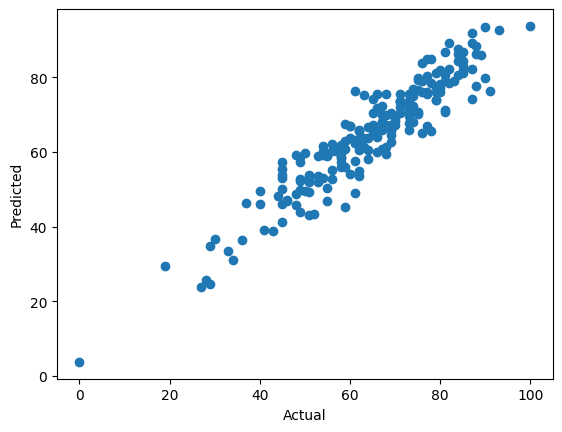

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

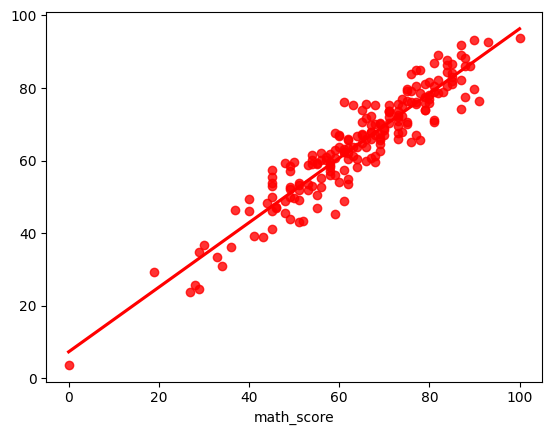

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='red')

In [24]:
train_df= pd.read_csv(r'c:/rkmlproject/artifacts/train.csv')
test_df = pd.read_csv(r'c:/rkmlproject/artifacts/test.csv')


In [ ]:
target_column= "math_score"
def TransformData(self):
        cat_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
        num_colums = ['reading_score', 'writing_score']

        # Create Category Pipline
        cat_pipeline = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('OneHotEncoder',OneHotEncoder()),
                ('StandardScler',StandardScaler())
            ]
        )

        # Create Num Pipline
        num_pipeline= Pipeline(
            steps=[
                ('Imputer',SimpleImputer(strategy='mean')),
                ('StandardScaler',StandardScaler())
            ]
        )
        # Join both Pipelines
        preprocessor= ColumnTransformer([
            ('num_pipeline',num_pipeline,num_colums),
            ('cat_pipeline',cat_pipeline,cat_columns)]
        )

        return preprocessor